In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib
plt.style.use('default')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

# Skip to the next Markdown to take experments

In [2]:
save_folder = 'train_0.5_valid_0.7_test'

# ===== TRAIN =====
train_data = pd.read_csv('../data/' + save_folder + '/train_data_170_Normalization.csv')
X_train = train_data.drop(['Species'], axis=1).values
y_train = train_data[['Species']].copy().values
y_train = np.squeeze(y_train)

# ===== VALID =====
valid_data = pd.read_csv('../data/' + save_folder + '/train_data_170_valid.csv')
X_valid = valid_data.drop(['Species'], axis=1).values
y_valid = valid_data[['Species']].copy().values
y_valid = np.squeeze(y_valid)

# ===== TEST =====
test_data = pd.read_csv('../data/' + save_folder + '/train_data_170_test.csv')
X_test = test_data.drop(['Species'], axis=1).values
y_test = test_data[['Species']].copy().values
y_test = np.squeeze(y_test)

In [3]:
#KMeans

kmeans = KMeans(n_clusters=3, max_iter = 300)
kmeans.fit(X_train, [1,1,1,1,0.1,0.1,1])
kmeans.fit(X_train)

# training predictions
train_labels= kmeans.predict(X_train)

#testing predictions
valid_labels = kmeans.predict(X_valid)
a = train_labels
b = valid_labels

In [4]:
#KMeans model accuracy

#training accuracy
#print(accuracy_score(y_train, train_labels)*100)
#testing accuracy
#print(accuracy_score(y_valid, valid_labels)*100)
print(accuracy_score(np.floor(y_train + 1.1).astype(int), a)*100)
print(accuracy_score(np.floor(y_valid + 1.1).astype(int), b)*100)

9.411764705882353
7.352941176470589


In [5]:
a = train_labels
for i, v in enumerate(a):
    if v == 2:
        a[i] = 3

for i, v in enumerate(a):
    if v == 1:
        a[i] = 2
        
for i, v in enumerate(a):
    if v == 3:
        a[i] = 1

In [6]:
b = valid_labels
for i, v in enumerate(b):
    if v == 2:
        b[i] = 3

for i, v in enumerate(b):
    if v == 1:
        b[i] = 2
        
for i, v in enumerate(b):
    if v == 3:
        b[i] = 1

In [7]:
#train_labels = accuracy_score(np.floor(y_train + 1.1).astype(int)
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{np.int32(0): np.int64(61),
 np.int32(1): np.int64(57),
 np.int32(2): np.int64(52)}

In [8]:
kmeans = KMeans(init='k-means++', n_clusters=3, max_iter = 300, algorithm='lloyd')
kmeans.fit(X_train, [1,1,1,1,1,1,1])
kmeans.fit(X_train)

# training predictions
train_labels= kmeans.predict(X_train)

#testing predictions
test_labels = kmeans.predict(X_test)

unique, counts = np.unique(train_labels, return_counts=True)
dict_cluster_population = dict(zip(unique, counts))

temp_labels = train_labels.copy() + 3
test_temp = test_labels + 3
key_0_true = max(dict_cluster_population, key=dict_cluster_population.get) + 3
key_1_true = min(dict_cluster_population, key=dict_cluster_population.get) + 3
key_2_true = 3 - key_0_true - key_1_true + 9

for i, v in enumerate(temp_labels):
    if v == key_0_true:
        temp_labels[i] = 0
    elif v == key_1_true:
        temp_labels[i] = 1
    else:
        temp_labels[i] = 2
        
for i, v in enumerate(test_temp):
    if v == key_0_true:
        test_temp[i] = 0
    elif v == key_1_true:
        test_temp[i] = 1
    else:
        test_temp[i] = 2

print(accuracy_score(np.floor(y_train + 1.1).astype(int), temp_labels)*100)
print(accuracy_score(np.floor(y_test + 1.1).astype(int), test_temp)*100)

98.23529411764706
97.11538461538461


In [9]:
temp_labels

array([0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 0,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0,
       0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2,
       1, 0, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0,
       2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2], dtype=int32)

In [10]:
# train_labels += 3
dict_cluster_population
temp_labels = train_labels.copy() + 3
test_temp = test_labels + 3
key_0_true = max(dict_cluster_population, key=dict_cluster_population.get) + 3
key_1_true = min(dict_cluster_population, key=dict_cluster_population.get) + 3
key_2_true = 3 - key_0_true - key_1_true + 9

for i, v in enumerate(temp_labels):
    if v == key_0_true:
        temp_labels[i] = 0
    elif v == key_1_true:
        temp_labels[i] = 1
    else:
        temp_labels[i] = 2
        
for i, v in enumerate(test_temp):
    if v == key_0_true:
        test_temp[i] = 0
    elif v == key_1_true:
        test_temp[i] = 1
    else:
        test_temp[i] = 2

print(accuracy_score(np.floor(y_train + 1.1).astype(int), temp_labels)*100)
print(accuracy_score(np.floor(y_test + 1.1).astype(int), test_temp)*100)

98.23529411764706
97.11538461538461


# Experiment part

In [11]:
# Keep the data (jump to the model, ignore the block below)
save_folder = 'train_0.5_valid_0.7_test'
train_data = pd.read_csv('../data/' + save_folder + '/train_data_170_Normalization.csv')
X_train = train_data.drop(['Species'], axis = 1).values
# X_train = train_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
y_train = train_data[['Species']].copy().values
test_data = pd.read_csv('../data/' + save_folder + '/train_data_170_test.csv')
X_test = test_data.drop(['Species'], axis = 1).values
# X_test = test_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
y_test = test_data[['Species']].copy().values

y_train = np.squeeze(y_train)

y_test = np.squeeze(y_test)

In [12]:
# Remove culmen length (optional)
save_folder = 'train_0.5_valid_0.7_test'
train_data = pd.read_csv('../data/' + save_folder + '/train_data_170_Normalization.csv')
X_train = train_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
y_train = train_data[['Species']].copy().values
test_data = pd.read_csv('../data/' + save_folder + '/train_data_170_test.csv')
X_test = test_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
y_test = test_data[['Species']].copy().values

y_train = np.squeeze(y_train)

y_test = np.squeeze(y_test)

In [13]:
def runKMeans(init, max_iter, algo, n_init, X_train, X_test, y_test):
    kmeans = KMeans(init=init, n_clusters=3, max_iter = max_iter, algorithm = algo, n_init=n_init, tol = 0)
    kmeans.fit(X_train)

    # training predictions
    train_labels= kmeans.predict(X_train)

    #testing predictions
    test_labels = kmeans.predict(X_test)

    unique, counts = np.unique(train_labels, return_counts=True)
    dict_cluster_population = dict(zip(unique, counts))

    temp_labels = train_labels.copy() + 3
    test_temp = test_labels + 3
    key_0_true = max(dict_cluster_population, key=dict_cluster_population.get) + 3
    key_1_true = min(dict_cluster_population, key=dict_cluster_population.get) + 3
    key_2_true = 3 - key_0_true - key_1_true + 9

    for i, v in enumerate(temp_labels):
        if v == key_0_true:
            temp_labels[i] = 0
        elif v == key_1_true:
            temp_labels[i] = 1
        else:
            temp_labels[i] = 2

    for i, v in enumerate(test_temp):
        if v == key_0_true:
            test_temp[i] = 0
        elif v == key_1_true:
            test_temp[i] = 1
        else:
            test_temp[i] = 2

    a = accuracy_score(np.floor(y_train + 1.1).astype(int), temp_labels)*100
    b = accuracy_score(np.floor(y_test + 1.1).astype(int), test_temp)*100
    return a, b, train_labels

In [14]:
for i in range (1, 11):
    list_a3 = list()
    list_b3 = list()
    print(i, end = ': ')
    a, b, c = runKMeans('k-means++', i, 'elkan', 3, X_train, X_test, y_test)
    list_a3.append(a)
    list_b3.append(b)
    print(a, b)

1: 10.0 12.5
2: 9.411764705882353 12.5
3: 9.411764705882353 12.5
4: 9.411764705882353 12.5
5: 9.411764705882353 12.5
6: 9.411764705882353 12.5
7: 9.411764705882353 12.5
8: 9.411764705882353 12.5
9: 9.411764705882353 12.5
10: 9.411764705882353 12.5


In [15]:
c

array([2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0,
       1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 0,
       0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0,
       0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0,
       1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1], dtype=int32)

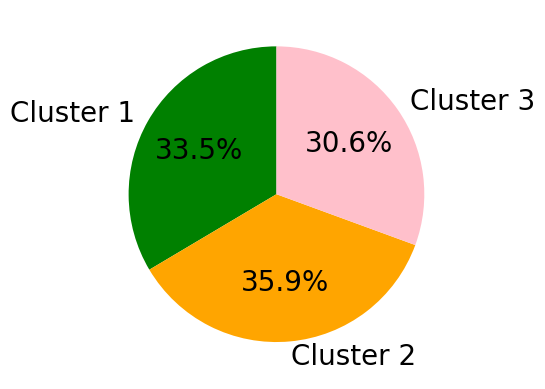

In [16]:
len_c = len(c)
cluster_A = np.count_nonzero(c == 0) / len_c
cluster_B = np.count_nonzero(c == 1) / len_c
cluster_C = 1 - cluster_A - cluster_B
# species_list = list()
# species_list.append((df_remove_spare_columns['Species'].values ==
#                      'Adelie Penguin (Pygoscelis adeliae)').sum() / num_instances)
# species_list.append((df_remove_spare_columns['Species'].values ==
#                      'Chinstrap penguin (Pygoscelis antarctica)').sum() / num_instances)
# species_list.append((df_remove_spare_columns['Species'].values ==
#                      'Gentoo penguin (Pygoscelis papua)').sum() / num_instances)
plt.pie([cluster_A, cluster_B, cluster_C], labels = ['Cluster 1', 'Cluster 2', 'Cluster 3'], 
        autopct='%1.1f%%', startangle=90, colors = ['green', 'orange', 'pink'])

plt.savefig('../pics/K_Means/full_pie.svg', bbox_inches='tight')
plt.savefig('../pics/K_Means/full_pie.pdf', bbox_inches='tight')

In [17]:
list_a1 = list()
list_b1 = list()
for i in range (1, 11):
    print(i, end = ': ')
    a, b, c = runKMeans('k-means++', i, 'lloyd', 5, X_train, X_test, y_test)
    list_a1.append(a)
    list_b1.append(b)
    print(a, b)

1: 9.411764705882353 12.5
2: 9.411764705882353 12.5
3: 9.411764705882353 12.5
4: 9.411764705882353 12.5
5: 9.411764705882353 12.5
6: 9.411764705882353 12.5
7: 9.411764705882353 12.5
8: 9.411764705882353 12.5
9: 9.411764705882353 12.5
10: 9.411764705882353 12.5


In [18]:
list_a2 = list()
list_b2 = list()
for i in range (1, 11):
    print(i, end = ': ')
    a, b, d = runKMeans('random', i, 'lloyd', 5, X_train, X_test, y_test)
    list_a2.append(a)
    list_b2.append(b)
    print(a, b)

1: 62.35294117647059 57.692307692307686
2: 20.0 20.192307692307693
3: 9.411764705882353 12.5
4: 20.0 20.192307692307693
5: 9.411764705882353 12.5
6: 9.411764705882353 12.5
7: 9.411764705882353 12.5
8: 9.411764705882353 12.5
9: 8.823529411764707 11.538461538461538
10: 9.411764705882353 12.5


In [19]:
print(list_a1)
print(list_b1)
print(list_a2)
print(list_b2)

[9.411764705882353, 9.411764705882353, 9.411764705882353, 9.411764705882353, 9.411764705882353, 9.411764705882353, 9.411764705882353, 9.411764705882353, 9.411764705882353, 9.411764705882353]
[12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5]
[62.35294117647059, 20.0, 9.411764705882353, 20.0, 9.411764705882353, 9.411764705882353, 9.411764705882353, 9.411764705882353, 8.823529411764707, 9.411764705882353]
[57.692307692307686, 20.192307692307693, 12.5, 20.192307692307693, 12.5, 12.5, 12.5, 12.5, 11.538461538461538, 12.5]


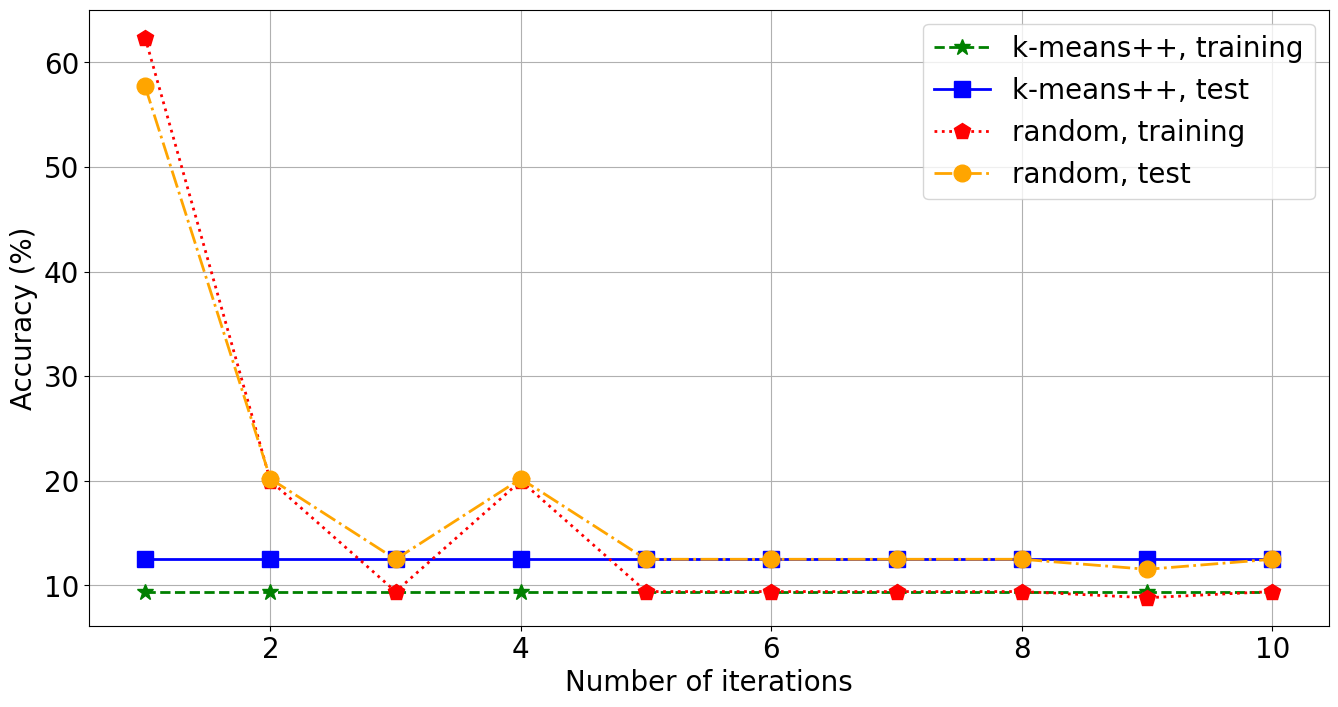

In [20]:
plt.rcParams['figure.figsize'] = [16, 8]
maxiters = list(range(1, 11))
plt.plot(maxiters, list_a1, color='green', marker='*', linestyle='dashed',
     linewidth=2, markersize=12, label = 'k-means++, training')
plt.plot(maxiters, list_b1, color='blue', marker='s', linestyle='-',
     linewidth=2, markersize=12, label = 'k-means++, test')
plt.plot(maxiters, list_a2, color='red', marker='p', linestyle='dotted',
     linewidth=2, markersize=12, label = 'random, training')
plt.plot(maxiters, list_b2, color='orange', marker='o', linestyle='-.',
     linewidth=2, markersize=12, label = 'random, test')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.savefig('../pics/K_Means/full_iterations.svg', bbox_inches='tight')
plt.savefig('../pics/K_Means/full_iterations.pdf', bbox_inches='tight')

In [21]:
def runKMeans(init, max_iter, algo, n_init, X_train, X_test, y_test):
    kmeans = KMeans(init=init, n_clusters=3, max_iter = max_iter, algorithm = algo, n_init=n_init, tol = 0)
    kmeans.fit(X_train)

    # training predictions
    train_labels= kmeans.predict(X_train)

    #testing predictions
    test_labels = kmeans.predict(X_test)

    unique, counts = np.unique(train_labels, return_counts=True)
    dict_cluster_population = dict(zip(unique, counts))

    temp_labels = train_labels.copy() + 3
    test_temp = test_labels + 3
    key_0_true = max(dict_cluster_population, key=dict_cluster_population.get) + 3
    key_1_true = min(dict_cluster_population, key=dict_cluster_population.get) + 3
    key_2_true = 3 - key_0_true - key_1_true + 9

    for i, v in enumerate(temp_labels):
        if v == key_0_true:
            temp_labels[i] = 0
        elif v == key_1_true:
            temp_labels[i] = 1
        else:
            temp_labels[i] = 2

    for i, v in enumerate(test_temp):
        if v == key_0_true:
            test_temp[i] = 0
        elif v == key_1_true:
            test_temp[i] = 1
        else:
            test_temp[i] = 2

    a = accuracy_score(np.floor(y_train + 1.1).astype(int), temp_labels)*100
    b = accuracy_score(np.floor(y_test + 1.1).astype(int), test_temp)*100
    return a, b, temp_labels, test_temp

In [22]:
a, b, c, d = runKMeans('k-means++', 10, 'lloyd', 5, X_train, X_test, y_test)

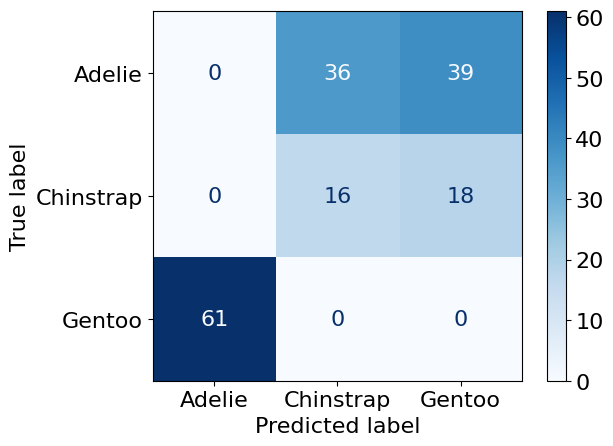

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

labels = ["Adelie", "Chinstrap", "Gentoo"]
font = {
    'size'   : 16}
plt.rc('font', **font)

cm = confusion_matrix(np.floor(y_train + 1.1).astype(int), c)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.savefig('../pics/K_Means/TrainConfusionMatrixDisplay.svg', bbox_inches='tight')
plt.savefig('../pics/K_Means/TrainConfusionMatrixDisplay.pdf', bbox_inches='tight')
plt.show()

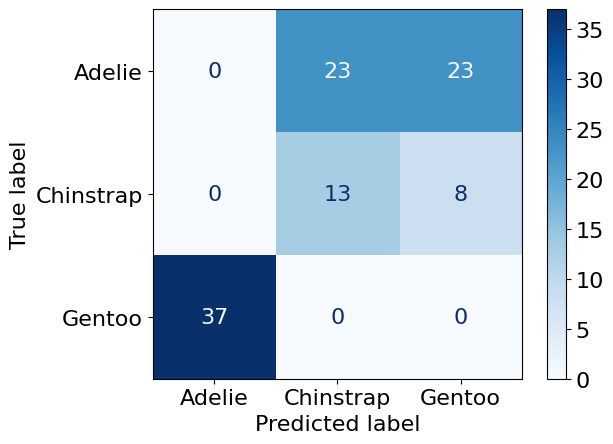

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

labels = ["Adelie", "Chinstrap", "Gentoo"]
font = {
    'size'   : 16}
plt.rc('font', **font)

labels = ["Adelie", "Chinstrap", "Gentoo"]

cm = confusion_matrix(np.floor(y_test + 1.1).astype(int), d)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.savefig('../pics/K_Means/TestConfusionMatrixDisplay.svg', bbox_inches='tight')
plt.savefig('../pics/K_Means/TestConfusionMatrixDisplay.pdf', bbox_inches='tight')
plt.show()

In [25]:
precision = precision_score(np.floor(y_train + 1.1).astype(int), c, average='micro')
recall =  recall_score(np.floor(y_train + 1.1).astype(int), c, average='micro')
f1 = f1_score(np.floor(y_train + 1.1).astype(int), c, average='micro')
precision, recall, f1

(0.09411764705882353, 0.09411764705882353, 0.09411764705882353)

In [26]:
precision = precision_score(np.floor(y_test + 1.1).astype(int), d, average='micro')
recall =  recall_score(np.floor(y_test + 1.1).astype(int), d, average='micro')
f1 = f1_score(np.floor(y_test + 1.1).astype(int), d, average='micro')
precision, recall, f1

(0.125, 0.125, 0.125)